In [ ]:
!pip install google-play-scraper
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
## Reviews All

from google_play_scraper import Sort, reviews_all
result = reviews_all(
    'com.bukalapak.android',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
## Reviews Tergantung inputan

from google_play_scraper import Sort, reviews
result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=100,
    filter_score_with=None
)

In [ ]:
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

In [ ]:
len(df.index)

In [ ]:
new_df = df[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]
my_df.to_csv("scrapped_data.csv", index = False)

In [ ]:
### Scrapping dari stackoverflow
# Define function to scrape reviews for a specific country and language combination
from google_play_scraper import Sort, reviews_all
def scrape_reviews(country, lang):
    reviews = reviews_all(
        'com.ruangguru.livestudents',
        sleep_milliseconds=0,
        lang=lang,
        country=country,
        # sort=Sort.NEWEST
    )
    reviews_df = pd.DataFrame(reviews)
    try:
        reviews_df = reviews_df[['reviewId', 'userName', 'userImage', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt']].assign(Country_name=df.loc[df['country'] == country, 'Country_name'].iloc[0], Language=lang)
    except KeyError:
        reviews_df = pd.DataFrame()
    return reviews_df

# Define dataframe containing country and language combinations
data = {'Country_name': ['Indonesia', 'Malaysia', 'Indonesia', 'Malaysia'],
        'country': ['ID', 'MY', 'ID', 'MY'],
        'Language': ['Indonesian', 'Malay', 'English', 'English'],
        'lang': ['id', 'ms', 'en', 'en']
       }


df = pd.DataFrame(data)

reviews_dfs = df.apply(lambda row: scrape_reviews(row['country'], row['lang']), axis=1)
combined_reviews_df = pd.concat(reviews_dfs.to_list(), ignore_index=True)

#remove duplicates
combined_reviews_df = combined_reviews_df.groupby(['content', 'Language']).first().reset_index()
combined_reviews_df

,content,Language,reviewId,userName,userImage,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,Country_name
0,(Kata sandinya) SD INPRES PAUPANDA 2,id,51247510-0ee4-4056-8cad-71fccca2d8af,Nur Hidayah,https://play-lh.googleusercontent.com/a-/ALV-U...,5,0,None,2024-01-26 08:39:57,Thanks Nur atas bintang 5-nya. Seneng deh Apli...,2024-01-26 09:33:07,Indonesia
1,.1 09,ms,853e1827-0541-4255-b212-d2e33b228287,Fajri Lutfi,https://play-lh.googleusercontent.com/a/ACg8oc...,1,0,None,2021-09-30 08:30:06,Halo Fajri! Kami sangat sedih nih mendapat bin...,2021-09-30 08:40:13,Malaysia
2,:( tolong dong mb nya dikecilin soalnya memori...,en,7a91fa35-1df5-4fab-9529-9633c1a84690,D-EZ-nonymuz,https://play-lh.googleusercontent.com/a-/ALV-U...,3,0,None,2022-01-11 02:46:33,"Halo. Jangan khawatir, kamu masih bisa mengaks...",2022-01-11 03:10:36,Indonesia
3,A mimir,en,b2852c3b-6c3e-487b-85c0-d491c272c96b,Rahma Azi,https://play-lh.googleusercontent.com/a-/ALV-U...,5,0,None,2023-07-26 07:31:23,None,NaT,Indonesia
4,ACl Gamestop,id,0214d1bb-96c7-4792-b47f-0fc8e6216b77,Diara Bas,https://play-lh.googleusercontent.com/a/ACg8oc...,5,0,None,2024-02-02 09:35:07,Makasih Diara atas bintang 5-nya. Ruangguru me...,2024-02-02 09:40:00,Indonesia
...,...,...,...,...,...,...,...,...,...,...,...,...
1666,😊😊😊😊,ms,22ec5914-1f04-42a1-a38e-3aa181def95b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5,0,None,2019-11-24 10:31:54,Hai Fauziah. Terima kasih atas bintang 5 yang ...,2019-11-24 11:52:48,Malaysia
1667,😍😍😍😍,ms,906a7841-29e2-4bcb-9958-33d840fc9bbc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,5,1,5.1.2,2020-03-20 11:37:12,"Hai, makasih atas bintang 5 nya. Kami sangat b...",2020-03-29 14:21:07,Malaysia
1668,🙏🏼,en,66b92121-2408-4846-9e52-9b59a415d18f,ailsa rachman,https://play-lh.googleusercontent.com/a/ACg8oc...,5,0,None,2021-12-27 01:22:46,"Hai Ailsa, terima kasih sudah memberikan binta...",2021-12-27 01:49:55,Indonesia
1669,🥺🥺💓💓💓💓💓💓,en,9341564e-5768-4c69-badc-d2886948921b,Waode Azizah,https://play-lh.googleusercontent.com/a-/ALV-U...,5,0,6.32.0,2022-04-17 23:14:08,None,NaT,Indonesia


In [ ]:
new_df = combined_reviews_df[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df

,userName,score,at,content
784,Paula Manaruri,5,2024-03-21 13:19:15,Oke🥰🥰
99,Yustinus Alexsander,5,2024-03-21 11:57:55,Aplikasi ini sangat bagus kalau penjelsanya le...
404,ax el,5,2024-03-21 11:25:29,Gara Gara ini IQ KU NAIK😁👍
931,Adry Daea,5,2024-03-21 08:11:57,Sangat membantu
1570,Adilene Aida,3,2024-03-21 07:55:57,sering ngelagg 😔😔😔😔
...,...,...,...,...
1130,Pengguna Google,5,2019-07-17 11:39:17,Terbaik lah 👍
1582,Pengguna Google,5,2019-07-17 05:47:42,sngat2 hebat aplikasi ini membuat rakyat menja...
1549,Pengguna Google,5,2019-07-15 04:34:07,sangt mnyenang kn dn mmbuwt kit cpt memahaminx...
606,Pengguna Google,5,2019-07-14 12:43:38,Keren banget


In [ ]:
my_df = sorted_df[['userName', 'score','at', 'content']]
my_df.to_csv("scrapped_data.csv", index = False)

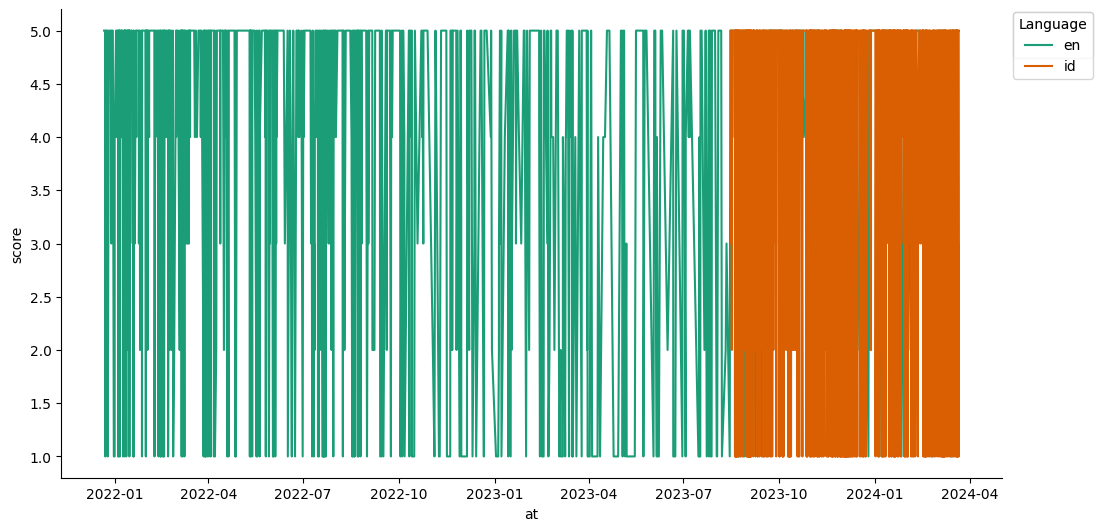

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Language')):
  _plot_series(series, series_name, i)
  fig.legend(title='Language', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

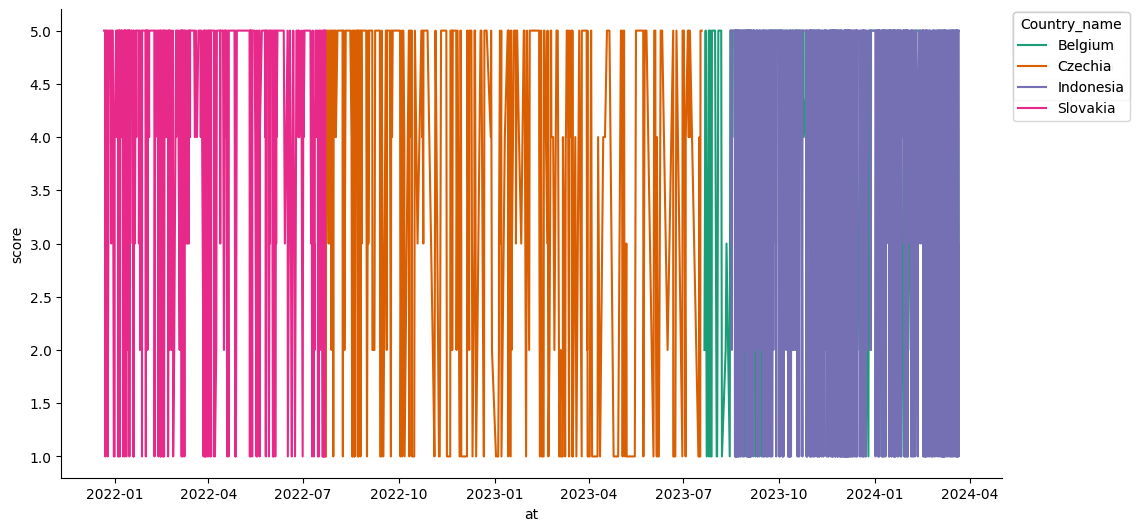

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['at']
  ys = series['score']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_reviews_df.sort_values('at', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Country_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Country_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('at')
_ = plt.ylabel('score')

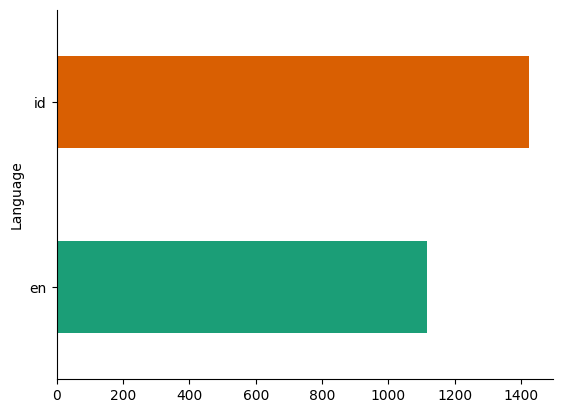

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
combined_reviews_df.groupby('Language').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

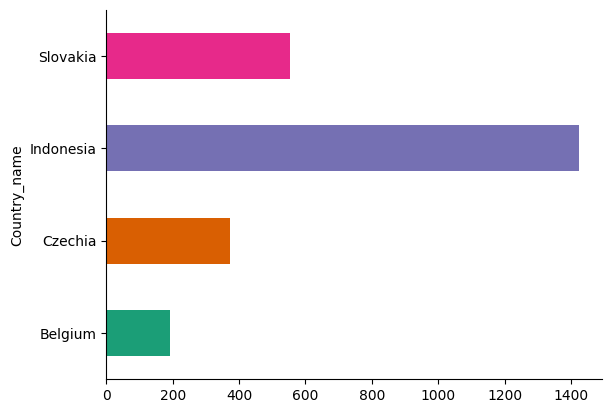

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
combined_reviews_df.groupby('Country_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

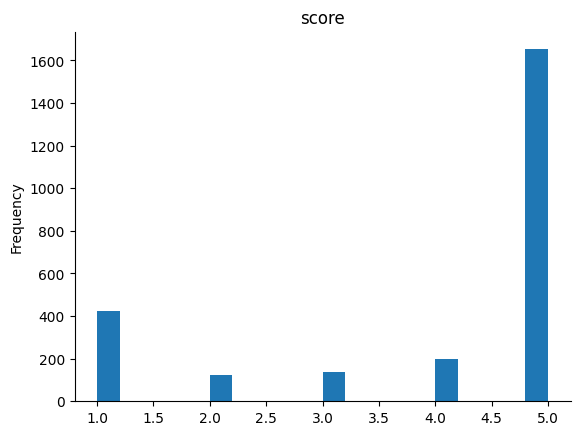

In [ ]:
from matplotlib import pyplot as plt
combined_reviews_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)